In [ ]:
import numpy as np 
import pandas as pd 

import os

In [ ]:
# read the file 
# this data has been randomised in Excel 
data = pd.read_csv("/content/LDPEv2.csv")

data

,percentage,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,...,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075
0,14.5,0.154443,0.087653,0.183019,0.157458,0.081471,0.177980,0.185204,0.099245,0.129501,0.140854,0.081941,0.103750,0.140634,0.097243,0.093217,0.114910,0.084957,0.071586,0.092752,0.110169,0.119594,0.120848,0.102122,0.079900,0.080120,0.077050,0.066844,0.054741,0.053726,0.066742,0.075640,0.074932,0.061360,0.059755,0.066126,0.058369,0.057043,0.065554,0.066235,...,0.329460,0.332117,0.333015,0.333127,0.332789,0.333016,0.335876,0.335984,0.332998,0.331000,0.331905,0.335269,0.335558,0.335383,0.336240,0.338055,0.338175,0.335592,0.338275,0.338879,0.331449,0.337393,0.345303,0.336882,0.333848,0.337135,0.341104,0.346201,0.348835,0.341522,0.340915,0.346896,0.344535,0.343837,0.345335,0.338783,0.339302,0.348537,0.346014,0.341414
1,5.0,0.322433,0.237023,0.296846,0.274595,0.216055,0.245933,0.275491,0.277099,0.248490,0.219416,0.210562,0.207069,0.203592,0.196206,0.197677,0.198699,0.167715,0.157451,0.175020,0.179406,0.179505,0.182777,0.180462,0.172811,0.161351,0.158294,0.161718,0.157183,0.150518,0.146077,0.152182,0.154628,0.138251,0.140918,0.155514,0.148858,0.140622,0.137465,0.137285,...,0.501364,0.502901,0.502392,0.503013,0.503894,0.505276,0.508150,0.508110,0.506326,0.511907,0.512466,0.505844,0.503679,0.504314,0.506676,0.510461,0.512560,0.511057,0.508741,0.508611,0.512559,0.513048,0.512292,0.514427,0.514087,0.511486,0.508836,0.511923,0.518562,0.521153,0.518263,0.512229,0.510127,0.515289,0.524158,0.519188,0.517287,0.523498,0.527715,0.528663
2,8.5,0.098144,0.142086,0.181873,0.175777,0.138013,0.106940,0.105487,0.124532,0.115407,0.098250,0.088500,0.120387,0.140420,0.083413,0.075116,0.094912,0.041709,0.027562,0.072292,0.065904,0.057185,0.079689,0.090924,0.088575,0.079629,0.069572,0.060602,0.051902,0.050599,0.058065,0.063176,0.064057,0.060108,0.061739,0.064428,0.050933,0.045964,0.054469,0.057202,...,0.312926,0.313015,0.312171,0.311256,0.311663,0.313448,0.315935,0.316229,0.314816,0.316499,0.317850,0.317882,0.318504,0.317245,0.313744,0.312665,0.314711,0.319188,0.319670,0.317466,0.315476,0.320897,0.326367,0.321387,0.321847,0.325201,0.322218,0.323657,0.328174,0.327248,0.327696,0.328889,0.323383,0.320830,0.322756,0.322572,0.323352,0.324947,0.321483,0.320563
3,5.5,0.102127,0.102084,0.088639,0.062043,0.045330,0.083775,0.109746,0.104427,0.054530,0.048970,0.117458,0.098232,0.053974,0.068373,0.065546,0.047041,0.043691,0.061420,0.089291,0.076629,0.052275,0.042122,0.043727,0.052417,0.062419,0.062793,0.055239,0.054058,0.051580,0.045107,0.041877,0.041268,0.041765,0.052681,0.066078,0.060109,0.055001,0.056758,0.057555,...,0.308610,0.306808,0.304473,0.307944,0.310391,0.310635,0.309759,0.310526,0.312294,0.309596,0.308727,0.310941,0.311031,0.308637,0.305394,0.310627,0.315266,0.313023,0.312569,0.314556,0.317794,0.312557,0.307978,0.316307,0.317497,0.312305,0.309096,0.313555,0.321550,0.320461,0.318443,0.318806,0.324758,0.328082,0.326953,0.327234,0.320605,0.309033,0.314174,0.319822
4,0.9,6.255705,5.192915,3.226855,5.381974,-7.777181,-2.733732,-5.734739,4.951552,3.849230,8.863362,-7.447401,24.417055,4.037733,6.005020,4.294542,2.444920,9.195415,-68.841469,14.188561,13.254835,16.187000,14.304601,17.229277,16.889919,7.436443,6.512906,9.988827,33.172543,117.280121,21.448151,23.680559,83.687927,-51.499458,-47.155422,114.012596,12.655388,12.432774,1687.394170,495.929749,...,155.441254,923.632690,-332.096985,775.661072,197.520416,160.735107,186.290298,388.111267,-1897.500000,2449.199950,335.497162,211.068939,-2893.027590,-249.481812,-478.020477,826.400452,297.923370,337.542877,391.153290,280.134918,157.594818,375.783142,-945.323730,239.787186,252.564682,-4117.141110,-793.589111,620.736389,163.512390,143.631302,159.1880

In [ ]:
# data pre-processing 
# separate labels and data body 

X_train = data.drop(['percentage'], axis=1)
y_train = pd.DataFrame(data['percentage'].values)
train_label = data['percentage']
feature_list = list(X_train.columns)
print(X_train)
print(y_train)

          325       326       327  ...         1073        1074        1075
0    0.154443  0.087653  0.183019  ...     0.348537    0.346014    0.341414
1    0.322433  0.237023  0.296846  ...     0.523498    0.527715    0.528663
2    0.098144  0.142086  0.181873  ...     0.324947    0.321483    0.320563
3    0.102127  0.102084  0.088639  ...     0.309033    0.314174    0.319822
4    6.255705  5.192915  3.226855  ...  2099.730710  264.420288  145.392883
..        ...       ...       ...  ...          ...         ...         ...
225  0.147716  0.103266  0.132773  ...     0.327569    0.320835    0.320351
226  0.205334  0.192264  0.258512  ...     0.481158    0.478737    0.478899
227  0.225686  0.165326  0.192150  ...     0.527100    0.528236    0.530628
228  0.302457  0.195786  0.299315  ...     0.489170    0.491294    0.490389
229  0.162777  0.158300  0.185502  ...     0.357473    0.360922    0.363375

[230 rows x 751 columns]
        0
0    14.5
1     5.0
2     8.5
3     5.5
4     0.9
..

In [ ]:
print(feature_list)
print(train_label)

['325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467'

In [ ]:
# prepare data 
# this format is readable by the ML algorithm 

X_train = data.drop(['percentage'], axis=1)
y_train = pd.DataFrame(data['percentage'].values)
train_label = data['percentage']
feature_list = list(X_train.columns)

print(X_train)
print(y_train)

          325       326       327  ...         1073        1074        1075
0    0.154443  0.087653  0.183019  ...     0.348537    0.346014    0.341414
1    0.322433  0.237023  0.296846  ...     0.523498    0.527715    0.528663
2    0.098144  0.142086  0.181873  ...     0.324947    0.321483    0.320563
3    0.102127  0.102084  0.088639  ...     0.309033    0.314174    0.319822
4    6.255705  5.192915  3.226855  ...  2099.730710  264.420288  145.392883
..        ...       ...       ...  ...          ...         ...         ...
225  0.147716  0.103266  0.132773  ...     0.327569    0.320835    0.320351
226  0.205334  0.192264  0.258512  ...     0.481158    0.478737    0.478899
227  0.225686  0.165326  0.192150  ...     0.527100    0.528236    0.530628
228  0.302457  0.195786  0.299315  ...     0.489170    0.491294    0.490389
229  0.162777  0.158300  0.185502  ...     0.357473    0.360922    0.363375

[230 rows x 751 columns]
        0
0    14.5
1     5.0
2     8.5
3     5.5
4     0.9
..

In [ ]:
# feature selection
# SELECTFROMMODEL technique
# use Random forest regressor 

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# selectfrommodel 
# source https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel
# assign the max_features parameters to avoid selecting large features 
sfm_selector = SelectFromModel(estimator=RandomForestRegressor(), max_features=3) 
sfm_selector.fit(X_train, y_train)
X_train.columns[sfm_selector.get_support()]

# output in ascending order of importance, i.e. last feature is the most important 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Index(['347', '776', '1072'], dtype='object')

In [ ]:
# read the file 
data = pd.read_csv("/content/LDPE1072.csv")

data

,percentage,1072
0,14.5,0.339302
1,5.0,0.517287
2,8.5,0.323352
3,5.5,0.320605
4,0.9,109.063995
...,...,...
225,8.0,0.324336
226,3.0,0.476816
227,1.9,0.532631
228,5.0,0.479202


In [ ]:
X_train = data.drop(['percentage'], axis=1)
y_train = pd.DataFrame(data['percentage'].values)
train_label = data['percentage']
feature_list = list(X_train.columns)
print(X_train)
print(y_train)

           1072
0      0.339302
1      0.517287
2      0.323352
3      0.320605
4    109.063995
..          ...
225    0.324336
226    0.476816
227    0.532631
228    0.479202
229    0.354429

[230 rows x 1 columns]
        0
0    14.5
1     5.0
2     8.5
3     5.5
4     0.9
..    ...
225   8.0
226   3.0
227   1.9
228   5.0
229  14.0

[230 rows x 1 columns]


In [ ]:
# split training and test data 
# Training (80%) and Testing (20%) Sets
# inactivated to avoid double split/export 

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data, train_label, test_size = 0.20, random_state = 42)

In [ ]:
# inactivated to avoid double split/export 

#train_split = (X_train)
#print(train_split)

#test_split = (X_test)
#print(test_split)

     percentage      1072
150         3.5  0.470686
55         12.0  0.338477
165        10.5  0.316443
69          0.4  0.377754
167        10.0  0.318636
..          ...       ...
106        10.0  0.322690
14          1.1  0.365579
92          2.0  0.527741
179         1.1  0.394401
102        11.0  0.317432

[184 rows x 2 columns]
     percentage        1072
217        11.5    0.333750
66          5.5    0.325854
9           8.0    0.345806
193         1.8    0.516027
15          1.3    0.254390
199         4.5    0.518885
25          1.5    0.444368
195         6.5    0.309704
154        11.0    0.316194
126         7.0    0.304475
218         7.0    0.298862
19          1.7    0.485686
96          0.6    0.199483
177        14.0    0.211113
223         6.0    0.335310
137         5.0    0.439559
146        10.5    0.323691
30          2.5    0.487948
225         8.0    0.324336
184         0.7    0.453053
108         4.5    0.473622
162         0.2    0.360464
204         0.2    0

In [ ]:
# save training data to csv
# inactivated to avoid double export 

#train_split.to_csv('LDPE1072train.csv', index=False)

In [ ]:
# save test data to csv
# inactivated to avoid double export 

#test_split.to_csv('LDPE1072test.csv', index=False)

In [ ]:
# reload the training and test data back 

# training data 
import pandas as pd
train_split = pd.read_csv('LDPE1072train.csv')
train_split.head(10)

,percentage,1072
0,3.5,0.470686
1,12.0,0.338477
2,10.5,0.316443
3,0.4,0.377754
4,10.0,0.318636
5,9.0,0.346005
6,0.1,0.379033
7,12.0,0.331116
8,0.8,106.761208
9,0.2,0.381692


In [ ]:
# reload the training and test data back 

# test data 
import pandas as pd
test_split = pd.read_csv('LDPE1072test.csv')
test_split.head(10)

,percentage,1072
0,11.5,0.333750
1,5.5,0.325854
2,8.0,0.345806
3,1.8,0.516027
4,1.3,0.254390
5,4.5,0.518885
6,1.5,0.444368
7,6.5,0.309704
8,11.0,0.316194
9,7.0,0.304475


In [ ]:
# check any missing data in training/test data 
# some algorithms cant handle missing data 

train_split.isnull().any().any()

# if return is False, good to go

False

In [ ]:
test_split.isnull().any().any()

False

In [ ]:
# check any repetitive data in training/test data 

# train data
sum(train_split.duplicated())

# if return is 0, good to go 

0

In [ ]:
# test data
# any repetitive data
sum(test_split.duplicated())

0

In [ ]:
# prepare train and test data for prediction 

# separate data body from the labels 
# convert data into arrays 
# labels is what we want to predict, i.e. MPs %
trainlabels = np.array(train_split['percentage'])

# next, separate the labels from the data body 
traindata = train_split.drop('percentage', axis = 1)
# print data body
traindata

,1072
0,0.470686
1,0.338477
2,0.316443
3,0.377754
4,0.318636
...,...
179,0.322690
180,0.365579
181,0.527741
182,0.394401


In [ ]:
# separate data body from the labels 
# convert data into arrays 
# labels is what we want to predict, i.e. MPs %
testlabels = np.array(test_split['percentage'])

# next, separate the labels from the data body 
testdata = test_split.drop('percentage', axis = 1)
# print data body
testdata

,1072
0,0.333750
1,0.325854
2,0.345806
3,0.516027
4,0.254390
5,0.518885
6,0.444368
7,0.309704
8,0.316194
9,0.304475


In [ ]:
# what we want to predict 
# MPs percentage 
trainlabels

array([ 3.5, 12. , 10.5,  0.4, 10. ,  9. ,  0.1, 12. ,  0.8,  0.2,  1.2,
        2. ,  0.9,  6.5,  1.6,  0.5,  1.4, 13. ,  1.1,  7. , 13. ,  1.2,
        0.8,  0.8,  1.7,  8. , 15. ,  9.5,  5.5,  9.5,  8.5,  4. ,  0.3,
       14. ,  2.5,  7. ,  4. ,  1.9, 11. ,  1. ,  5.5,  7. ,  1.8,  7.5,
        6.5,  0.6,  1.9, 13. ,  9. ,  0.4, 15. , 15. ,  9.5, 14.5,  8.5,
        1.2,  5. ,  0.2,  1.8,  1.3,  1.4,  1.3,  7.5,  6. ,  0.2, 11.5,
        1. ,  1.4, 10. ,  3. ,  8. ,  0.8,  9. ,  1.6, 10.5,  5. , 13.5,
       11.5,  1.7, 12.5,  9. , 10.5,  0.9, 13.5,  0.4,  2.5,  1. ,  0.5,
        1. ,  6. ,  2. ,  4.5,  1.5, 14. ,  1. ,  1.5,  9.5,  0.7,  2.5,
        1.2,  4.5,  0.7,  1.5,  0.1,  1.9,  3.5, 14.5,  4. ,  0.5,  5.5,
       12. ,  1.5, 13.5,  3.5,  0.7,  1.2,  0.6, 14.5,  1.3, 13. ,  0.5,
       14.5, 12.5,  0.1,  6. , 14.5,  3. ,  5.5, 13.5,  0.3,  0.7,  7.5,
        6.5,  1.8, 10. ,  7.5,  8.5,  0.5,  1.6, 12. ,  4. , 11. ,  1.1,
        0.3,  1.9,  3. ,  1.1, 14. ,  5. ,  8. , 10

In [ ]:
testlabels

array([11.5,  5.5,  8. ,  1.8,  1.3,  4.5,  1.5,  6.5, 11. ,  7. ,  7. ,
        1.7,  0.6, 14. ,  6. ,  5. , 10.5,  2.5,  8. ,  0.7,  4.5,  0.2,
        0.2,  0.6, 10.5,  4.5,  7.5,  0.8,  3.5,  1.4, 11.5,  0.1, 11.5,
        0.4,  9. ,  8.5,  6. ,  1.4,  2. ,  1.6, 15. ,  0.6, 11. , 12.5,
        0.9,  1.7])

In [ ]:
# TRAIN the model
# using Random forest regressor
# default hyperparameters 
# sklearn documentations:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(max_depth=None, random_state=42)

rf.fit(traindata, trainlabels)

# probably have to change the max depths, or else it'll overfit 
# default max depths is None

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# TEST trained model using test dataset 

predictions = rf.predict(testdata)
predictions

array([ 8.275, 11.815, 10.945,  4.221,  3.085,  4.092,  1.703,  9.815,
        8.265,  7.44 ,  7.42 ,  2.032,  1.517,  0.88 , 10.285,  1.004,
        8.05 ,  3.314,  7.38 ,  3.31 ,  3.81 ,  3.566,  0.69 ,  0.577,
        9.975,  3.31 ,  8.895,  0.878,  3.81 ,  0.65 , 12.03 , 12.03 ,
        9.65 ,  5.232,  8.465, 13.08 ,  2.898,  0.603,  1.004,  1.96 ,
        9.975,  0.709, 10.883,  8.554,  0.866,  2.032])

In [ ]:
# evaluate using performance metrics

# https://heartbeat.fritz.ai/random-forest-regression-in-python-using-scikit-learn-9e9b147e2153
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(testlabels, predictions)
rmse = np.sqrt(mse)
rmse

# RMSE is sensitive to outliers in your data
# You can’t compare RMSE scores across different domains and datasets
# https://stephenallwright.com/good-rmse-score/

3.512863943701282

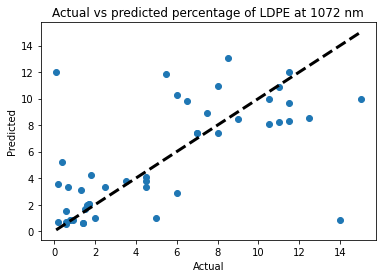

0.35075991413047913

In [ ]:
# plot actual vs predicted values 

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(testlabels, predictions)
ax.plot([testlabels.min(), testlabels.max()], [testlabels.min(), testlabels.max()], 'k--', lw=3)
r2 = r2_score(testlabels, predictions)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Actual vs predicted percentage of LDPE at 1072 nm')
plt.show()

r2